<a href="https://colab.research.google.com/github/IreneLedyaeva/CAP-5610/blob/master/HW2/problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN architecture with hold-out validation and a larger number of layers

### Loading the CIFAR10 data set

In [0]:
from keras.datasets import cifar10

(non_test_images, non_test_labels), (test_images, test_labels) = cifar10.load_data()

### Splitting non-test data into training and validation

In [3]:
num_validation_samples = int(non_test_images.shape[0] * 0.2)

train_images = non_test_images[num_validation_samples:] 
validation_images = non_test_images[:num_validation_samples]

train_labels = non_test_labels[num_validation_samples:] 
validation_labels = non_test_labels[:num_validation_samples]

print('total training images:', train_images.shape[0])
print('total validation images:', validation_images.shape[0])

total training images: 40000
total validation images: 10000


### Encoding the labels

In [0]:
from keras.utils import to_categorical

class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

train_labels = to_categorical(train_labels, num_classes)
validation_labels = to_categorical(validation_labels, num_classes)

### Preprocessing the data

In [0]:
train_images = train_images.astype('float32') / 255.0
validation_images = validation_images.astype('float32') / 255.0

### Building the model

In [14]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 32)        4128      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
__________

### Compiling the model

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

### Training the model

In [16]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=30,
                    batch_size=32,
                    verbose=1,
                    validation_data=(validation_images, validation_labels),
                    shuffle=True)

40000/40000 [==============================] - 150s 4ms/sample - loss: 1.6049 - acc: 0.4197 - val_loss: 1.4027 - val_acc: 0.4871
Epoch 2/30
40000/40000 [==============================] - 148s 4ms/sample - loss: 1.1781 - acc: 0.5840 - val_loss: 1.0078 - val_acc: 0.6481
Epoch 3/30
40000/40000 [==============================] - 148s 4ms/sample - loss: 0.9793 - acc: 0.6606 - val_loss: 0.9240 - val_acc: 0.6777
Epoch 4/30
40000/40000 [==============================] - 149s 4ms/sample - loss: 0.8486 - acc: 0.7050 - val_loss: 0.8938 - val_acc: 0.6916
Epoch 5/30
40000/40000 [==============================] - 148s 4ms/sample - loss: 0.7461 - acc: 0.7395 - val_loss: 0.8473 - val_acc: 0.7082
Epoch 6/30
40000/40000 [==============================] - 148s 4ms/sample - loss: 0.6679 - acc: 0.7692 - val_loss: 0.8531 - val_acc: 0.7101
Epoch 7/30
40000/40000 [==============================] - 148s 4ms/sample - loss: 0.5979 - acc: 0.7933 - val_loss: 0.8160 - val_acc: 0.7332
Epoch 8/30
40000/40000 [=======

The final training accuracy: 0.8906

The final validation accuracy: 0.6980

### Saving the model

In [0]:
model_fname = 'model_additional_layers.h5' 
model.save(model_fname)

### Downloading the model

In [0]:
from google.colab import files

with open(model_fname, 'r') as f:
  files.download(model_fname)

### Checking overfitting

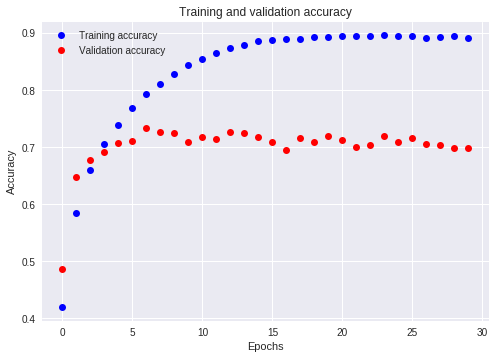

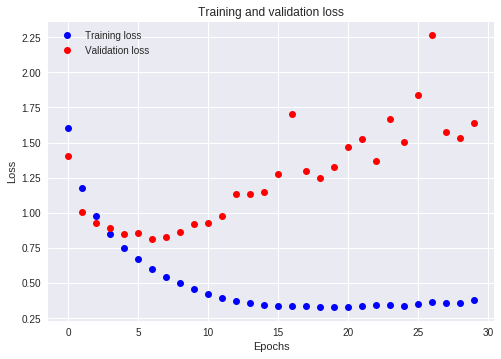

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()